# Systems of Equations

A [system of differential equations](https://en.wikipedia.org/wiki/System_of_differential_equations) is a collection of equations involving unknown functions $u_0,\dots,u_{N-1}$ and their derivatives. The dimension of a system is the number $N$ of unknown functions. The order of the system is the highest order derivative appearing in the collection of equations. Every system of differential equations is equivalent to a first order system in a higher dimension.

In [1]:
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt

## First Order Systems

Every system of differential equations is equivalent to a first order system in a higher dimension. For example, consider a second order differential equation

$$
ay'' + by' + cy = F(t)
$$

where $a,b,c$ are constants (with $a \ne 0$) and $F(t)$ is a known function. The unknown function $y(t)$ is second order in the equation therefore we introduce two new variables $u_0 = y$ and $u_1 = y'$ and write the 1-dimensional second order equation as a 2-dimensional first order system

\begin{align}
u_0' &= u_1 \\\
u_1' &= (F(t) - b u_1 - c u_0)/a
\end{align}

The procedure for any system is similar:

1. Identify the order of each unknown function in the system.
2. If $y$ has order $n$ then introduce $n$ new variables $u_0 = y,u_1=y',\dots,u_{n-1}=y^{(n-1)}$.
3. Rewrite the equations in terms of the new variables only.

For example, consider the system

\begin{align}
x' &= x + y \\\
y'' &= xy' + y
\end{align}

Introduce new variables $u_0 = x, u_1 = y, u_2 = y'$ and rewrite the system

\begin{align}
u_0' &= u_0 + u_1 \\\
u_1' &= u_2 \\\
u_2' &= u_0 u_2 + u_1
\end{align}

## Vector Notation

An $N$-dimensional first order system of differential equations is of the form

\begin{align}
u_0' &= f_0(t,u_0,\dots,u_{N-1}) \\\ 
u_1' &= f_1(t,u_0,\dots,u_{N-1}) \\\ 
& \ \ \vdots \\\
u_{N-1}' &= f_{N-1}(t,u_0,\dots,u_{N-1})
\end{align}

Write the system in vector notation

$$
\frac{d \mathbf{u}}{dt} = \mathbf{f}(t,\mathbf{u})
$$

where

$$
\mathbf{u} = \begin{bmatrix} u_0 \\\ \vdots \\\ u_{N-1} \end{bmatrix}
\hspace{10mm}
\frac{d \mathbf{u}}{dt} = \begin{bmatrix} u_0' \\\ \vdots \\\ u_{N-1}' \end{bmatrix}
\hspace{10mm}
\mathbf{f}(t,\mathbf{u}) = \begin{bmatrix} f_0(t,u_0,\dots,u_{N-1}) \\\ \vdots \\\ f_{N-1}(t,u_0,\dots,u_{N-1}) \end{bmatrix}
$$

## Euler's Method

How do we apply Euler's method to a first order system of equations? Simply apply the method to each unknown function in the system.

### Second Order Equations

Consider a second order differential equation with constant coefficients

$$
ay'' + by' + cy = F(t) \ , \ y(0)=y_0 \ , \ y'(0)=v_0
$$

Apply Euler's method to both $y$ and $y'$ simultaneously:

\begin{align}
y_{n+1} &= y_n + y_n' h \\\
y_{n+1}' &= y_n' + y_n'' h
\end{align}

where

$$
y_n'' = (F(t_n) - cy_n - by_n')/a
$$

For example, consider the equation $y'' + y = 0$, $y(0)=1$, $y'(0)=0$. We know the exact solution is $y(t) = \cos(t)$. Compute the approximation by Euler's method and compare with the exact solution.

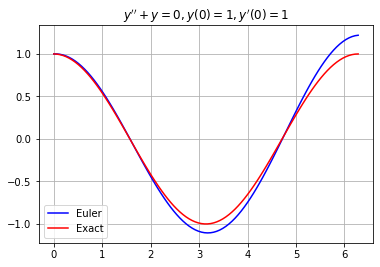

In [2]:
y0 = 1; v0 = 0;
t = np.linspace(0,2*np.pi,100)
y = np.zeros(len(t))
y[0] = y0
dy = np.zeros(len(t))
dy[0] = v0
for n in range(0,len(t)-1):
    h = t[n+1] - t[n]
    y[n+1] = y[n] + dy[n]*h
    dy[n+1] = dy[n] - y[n]*h
plt.plot(t,y,'b',t,np.cos(t),'r'), plt.grid(True)
plt.title("$y'' + y = 0 , y(0) = 1 , y'(0) = 1$")
plt.legend(["Euler","Exact"])
plt.show()

### Implementation

Consider a first order system in vector notation

$$
\frac{d \mathbf{u}}{dt} = \mathbf{f}(t,\mathbf{u})
$$

The formula for Euler's method is almost exactly the same as for scalar equations

$$
\mathbf{u}_{n+1} = \mathbf{u}_n + \mathbf{f}(t_n,\mathbf{u}_n) h
$$

where $\mathbf{u}_n$ is the vector of values at step $n$

$$
\begin{bmatrix} u_{0,n} \\\ \vdots \\\ u_{N-1,n} \end{bmatrix}
$$

such that $u_{k,n} \approx u_k(t_n)$ at step $n$ for $k=0,\dots,N-1$.

Write a function called `odeEuler` which takes input parameters `f`, `t` and `u0` where:

* `f` is a function which represents the right side of the equation $\mathbf{u}' = \mathbf{f}(t,\mathbf{u})$
* `t` is a 1D NumPy array
* `u0` is an intial value $\mathbf{u}(t_0)=\mathbf{u}_0$ where $t_0$ is the value `t[0]`

The function `odeEuler` returns a 2D NumPy array `U` of size `(len(t),len(u0))` with values $u_k(t_n)$ in column $k$ and row $n$.

In [3]:
def odeEuler(f,t,u0):
    U = np.zeros((len(t),len(u0)))
    U[0,:] = u0
    for n in range(0,len(t)-1):
        h = t[n+1] - t[n]
        k1 = f(t[n],U[n,:])
        U[n+1,:] = U[n,:] + k1*h
    return U

Test the function `odeEuler` on the example $y'' + y = 0, y(0)=1, y'(0)=0$ and compare to the exact solution $y(t) = \cos(t)$.

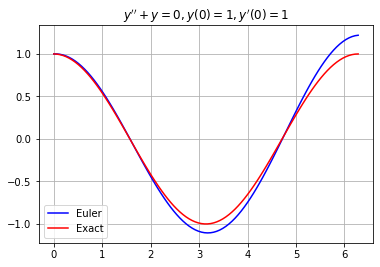

In [4]:
def f(t,u):
    dudt = np.zeros(2)
    dudt[0] = u[1]
    dudt[1] = -u[0]
    return dudt

t = np.linspace(0,2*np.pi,100)
u0 = [1,0]
U = odeEuler(f,t,u0)
plt.plot(t,U[:,0],'b',t,np.cos(t),'r'), plt.grid(True)
plt.title("$y'' + y = 0 , y(0) = 1 , y'(0) = 1$")
plt.legend(["Euler","Exact"])
plt.show()

## scipy.integrate.odeint

The function `scipy.integrate.odeint` works the same way as our funciton `odeEuler` above except the order of $t$ and $\mathbf{u}$ is reversed

$$
\frac{d \mathbf{u}}{dt} = \mathbf{f}(\mathbf{u},t)
$$

For example, use `odeint` to approximate the solution of the second order equation

$$
y'' + y = 0 \ , \ \ y(0)=1 \ , \ \ y'(0)=0
$$

and compare to the exact solution. The result is much more accurate than Euler's method!

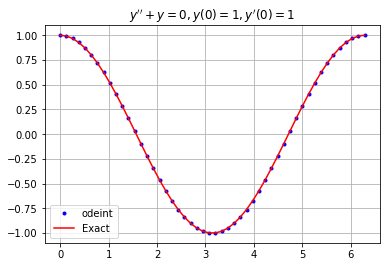

In [23]:
def f(u,t):
    dudt = np.zeros(2)
    dudt[0] = u[1]
    dudt[1] = -u[0]
    return dudt

t = np.linspace(0,2*np.pi,50)
u0 = [1,0]
U = spi.odeint(f,u0,t)
plt.plot(t,U[:,0],'b.',t,np.cos(t),'r'), plt.grid(True)
plt.title("$y'' + y = 0 , y(0) = 1 , y'(0) = 1$")
plt.legend(["odeint","Exact"])
plt.show()

## Applications

### Mass-Spring-Damper System

A mass-spring-damper system is a second order equation with constant coefficients:

$$
my'' + cy' + ky = F(t)
$$

where $m > 0, c \geq 0, k \geq 0$, and $F(t)$ is the forcing function. Write the equation as a 2-dimensional first order system by introducing new variables $u_0 = y$ and $u_1 = y'$:

\begin{align}
u'_0 &= u_1 \\\
u'_1 &= (F(t)-ku_0-cu_1)/m
\end{align}

Write a function called `mass_spring_damper` which takes input parameters `m`, `c`, `k`, `F`, `u0` and `t` where

* `m`, `c`, `k` are coefficients of the system
* `F` is the forcing function $F(t)$
* `u0` is the vector of initial conditions `u0 = [y(0), y'(0)]`
* `t` is a 1D NumPy array

The function returns an array `y` of values approximating the solution $y(t)$ at the $t$ values given by `t`.

In [24]:
def mass_spring_damper(m,c,k,F,u0,t):

    def f(u,t):
        dudt = np.zeros(2)
        dudt[0] = u[1]
        dudt[1] = (F(t) - k*u[0] - c*u[1])/m
        return dudt

    U = spi.odeint(f,u0,t)
    y = U[:,0]    
    return y

If $m=1$, $c=0$, $k=1$, $f(t)=0$, $y(0)=0$, $y'(0)=1$ then the equation is

$$
y'' + y = 0
$$

for $y(0)=0$, $y'(0)=1$ and the solution is

$$
y=\sin(t)
$$

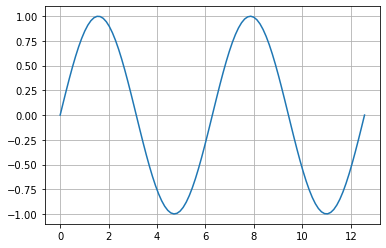

In [25]:
m = 1; c = 0; k = 1;
F = lambda t: 0
t = np.linspace(0,4*np.pi,100)
u0 = [0,1]
y = mass_spring_damper(m,c,k,F,u0,t)
plt.plot(t,y), plt.grid(True)
plt.show()

[Resonance](https://www.jirka.org/diffyqs/html/forcedo_section.html) occurs when there's no damping $c=0$ and the forcing frequency is equal to the natural frequency $\omega_n = \sqrt{k/m}$.

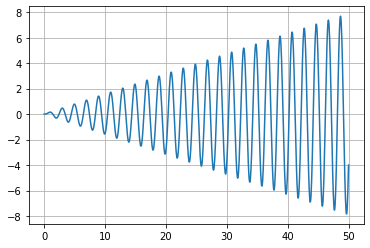

In [26]:
m = 1; c = 0; k = 10;
F = lambda t: np.sin(10**0.5*t)
t = np.linspace(0,50,1000)
u0 = [0,0]
y = mass_spring_damper(m,c,k,F,u0,t)
plt.plot(t,y), plt.grid(True)
plt.show()

[Beats](https://www.jirka.org/diffyqs/html/forcedo_section.html) describes the behaviour of an undamped system $c=0$ when the forcing frequency is near but not equal to the natural frequency $\omega_n = \sqrt{k/m}$.

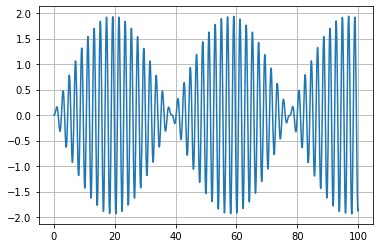

In [9]:
m = 1; c = 0; k = 10;
F = lambda t: np.sin(3*t)
t = np.linspace(0,100,1000)
u0 = [0,0]
y = mass_spring_damper(m,c,k,F,u0,t)
plt.plot(t,y), plt.grid(True)
plt.show()

In a damped system $c \not= 0$ there cannot be resonance however there is a forcing frequency which produces the largest steady state amplitude. This frequency is called the damped natural frequency (or [practical resonance](https://www.jirka.org/diffyqs/html/forcedo_section.html)).

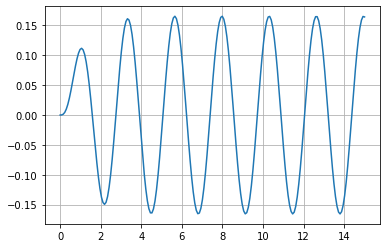

In [10]:
m = 1; c = 2; k = 10;
F = lambda t: np.sin(2.7*t)
t = np.linspace(0,15,200)
u0 = [0,0]
y = mass_spring_damper(m,c,k,F,u0,t)
plt.plot(t,y), plt.grid(True)
plt.show()

### Van der Pol Oscillator

The [Van der pol oscillator](https://en.wikipedia.org/wiki/Van_der_Pol_oscillator) equation is given by

$$
x'' - \mu(1 - x^2)x' + x = 0
$$

Write a function called `van_der_pol` which takes parameters `mu`, `u0` and `t` and returns a 2D NumPy array of size `(len(t),2)` with $x$ values in the first column and $x'$ values in the second column for the solution with initial values `u0 = [x(0),x'(0)]`.

In [11]:
def van_der_pol(mu,u0,t):

    def f(u,t):
        dudt = np.zeros(2)
        dudt[0] = u[1]
        dudt[1] = mu*(1 - u[0]**2)*u[1] - u[0]
        return dudt

    U = spi.odeint(f,u0,t)
    x = U[:,0]
    dxdt = U[:,1]    
    return np.column_stack((x,dxdt))

Plot $x$ versus $x'$ for the solution with $\mu = 1$, $x(0) = 1$ and $x'(0)=4$.

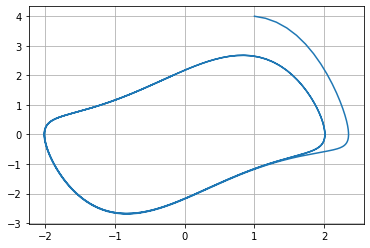

In [12]:
U = van_der_pol(1,[1,4],np.linspace(0,20,500))
plt.plot(U[:,0],U[:,1]), plt.grid(True)
plt.show()

Plot $x$ versus $x'$ for $x(0) = 1$ and $x'(0)=4$ for each value $\mu = 1,2,3,4$.

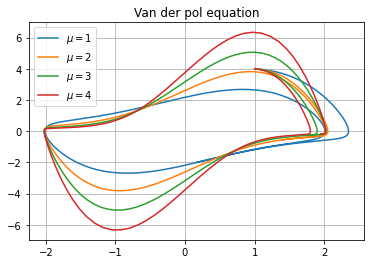

In [13]:
for mu in [1,2,3,4]:
    U = van_der_pol(mu,[1,4],np.linspace(0,10,500))
    plt.plot(U[:,0],U[:,1])
plt.title("Van der pol equation")
plt.grid(True), plt.legend(['$\mu=1$','$\mu=2$','$\mu=3$','$\mu=4$'])
plt.show()

### Planetary Orbits

Given an object with mass $M$, the magnitude of the force of gravity it exerts on another object with mass $m$ is

$$
F = \frac{GMm}{d^2}
$$

where $d$ is the distance between the objects. Let's consider the trajectory of a planet of mass $m$ as it orbits a star of mass $M$ (fixed in space). Let's use the following units:

* solar mass (multiples of the mass of Earth's Sun)
* years
* [astronomical units](https://en.wikipedia.org/wiki/Astronomical_unit) (approximately the distance from the Earth to the Sun)

With these units, the [gravitational constant](https://en.wikipedia.org/wiki/Gravitational_constant) $G$ is $4 \pi^2$.

Let $\mathbf{p} = (x,y)$ be the position of the orbiting planet with the star fixed at the origin $(0,0)$, and let $m_P$ be the mass of the planet and let $m_S$ be the mass of the star. Starting with [Newton's Second Law](https://en.wikipedia.org/wiki/Newton%27s_laws_of_motion#Newton.27s_second_law), we have

$$
m_P \frac{d^2 \mathbf{p}}{dt^2} = \mathbf{F}
$$

where $\mathbf{F}$ is the vector of total force acting on the planet (which is only due to gravity in this case). [Newton's law of gravity](https://en.wikipedia.org/wiki/Newton%27s_law_of_universal_gravitation) states

$$
\mathbf{F} = - \frac{G m_S m_P}{ || \mathbf{p} ||^2 } \frac{\mathbf{p}}{ || \mathbf{p} || }
$$

where $|| \mathbf{p} || = \sqrt{x^2 + y^2}$ is distance between the star and the planet, and $-\mathbf{p} / || \mathbf{p} ||$ is the unit vector which points in the direction from the planet to the star.

Putting these equations together, we obtain a 2-dimensional system of second-order differential equations

\begin{align}
\frac{d^2 x}{dt^2} &= - \frac{G m_S x }{ (x^2 + y^2)^{3/2} } \\\
\frac{d^2 y}{dt^2} &= - \frac{G m_S y }{ (x^2 + y^2)^{3/2} }
\end{align}

Write the system as a first order system by introducing new variables: $u_0 = x$, $u_1 = x'$, $u_2 = y$ and $u_3 = y'$. The system becomes

\begin{align}
u_0' &= u_1 \\\
u_1' &= - \frac{G m_S u_0 }{ (u_0^2 + u_2^2)^{3/2} } \\\
u_2' &= u_3 \\\
u_3' &= - \frac{G m_S u_2 }{ (u_0^2 + u_2^2)^{3/2} }
\end{align}

Plot the orbit for $m_S = 1$ with initial conditions $x(0) = 1, x'(0) = 0, y(0) = 0, y'(0) = 7$.

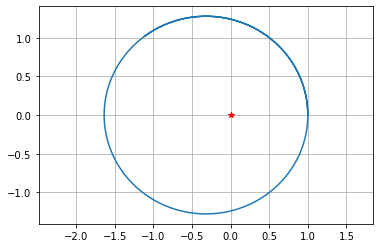

In [30]:
G = 4*np.pi**2; mS = 1;

def f(u,t):
    dudt = np.zeros(4)
    dudt[0] = u[1]
    dudt[1] = -G*mS*u[0]/(u[0]**2 + u[2]**2)**(3/2)
    dudt[2] = u[3]
    dudt[3] = -G*mS*u[2]/(u[0]**2 + u[2]**2)**(3/2)
    return dudt

u0 = [1,0,0,7]
t = np.linspace(0,2,1000)
U = spi.odeint(f,u0,t)
plt.plot(U[:,0],U[:,2],0,0,'r*')
plt.axis('equal'), plt.grid(True)
plt.show()

### Euler's 3-Body Problem

[Euler's 3-body problem](https://en.wikipedia.org/wiki/Euler%27s_three-body_problem) is a simplified (and admittedly physically impossible) version of the general [3-body problem](https://en.wikipedia.org/wiki/Three-body_problem). Euler's problem considers two stars fixed in space and a planet orbiting the stars in 2 dimensions. We will derive the equations of motion of the planet and then plot trajectories using SciPy's ODE solver `odeint`.

Use the following units:

* solar mass (multiples of the mass of Earth's Sun)
* years
* [astronomical units (AU)](https://en.wikipedia.org/wiki/Astronomical_unit) (approximately the distance from the Earth to the Sun)

With these units, the gravitational constant is $G = 4 \pi^2$. Introduce variables for the planet and the stars:

* $m_{S_1}$ - mass of star 1
* $m_{S_2}$ - mass of star 2
* $m_P$ - mass of the planet
* $x_{S_1}$ - (fixed) $x$-position of star 1
* $y_{S_1}$ - (fixed) $y$-position of star 1
* $x_{S_2}$ - (fixed) $x$-position of star 2
* $y_{S_2}$ - (fixed) $x$-position of star 2
* $x_P$ - $x$-position of the planet
* $y_P$ - $y$-position of the planet
* $\mathbf{p} = (x_P,y_P)$ - position vector of the planet

Let $\mathbf{F_1}$ be the force of gravity of star 1 acting on the planet, and let $\mathbf{F_2}$ be the force of gravity of star 2 acting on the planet. [Newton's Law of Gravity](https://en.wikipedia.org/wiki/Newton%27s_law_of_universal_gravitation) states:

$$
\mathbf{F_1} = - \frac{ G m_P m_{S_1} }{ || \mathbf{d_1} ||^2} \frac{ \mathbf{d_1} }{ || \mathbf{d_1} || }
$$

$$
\mathbf{F_2} = - \frac{ G m_P m_{S_2} }{ || \mathbf{d_2} ||^2} \frac{ \mathbf{d_2} }{ || \mathbf{d_2} || }
$$

where $\mathbf{d_1} = (x_P-x_{S_1},y_P-y_{S_1})$ is the vector from star 1 to the planet, and $\mathbf{d_2} = (x_P-x_{S_2},y_P-y_{S_2})$ is the vector from star 2 to the planet.

[Newton's Second Law of Motion](https://en.wikipedia.org/wiki/Newton%27s_laws_of_motion) states:

$$
\frac{ d^2 \mathbf{x} }{ dt^2 } = \mathbf{F}_1 + \mathbf{F}_2
$$

and this leads us to the system of second order ODEs which govern the motion of the planet:

$$
\frac{d^2 x_P}{dt^2} = - \frac{ G m_{S_1} (x_P - x_{S_1}) }{ || \mathbf{d_1} ||^3} - \frac{ G m_{S_2} (x_P - x_{S_2}) }{ || \mathbf{d_2} ||^3}
$$
$$
\frac{d^2 y_P}{dt^2} = - \frac{ G m_{S_1} (y_P - y_{S_1}) }{ || \mathbf{d_1} ||^3} - \frac{ G m_{S_2} (y_P - y_{S_2}) }{ || \mathbf{d_2} ||^3}
$$

To plot trajectories of the planet using `odeint`, we first need to write the system as a first order system. Introduce new variables $u_1 = x_P$, $u_2 = x_P'$, $u_3 = y_P$ and $u_4 = y_P'$ and write

\begin{align}
u_1' &= u_2 \\\
u_2' &= - \frac{ G m_{S_1} (u_1 - x_{S_1}) }{ || \mathbf{d_1} ||^3} - \frac{ G m_{S_2} (u_1 - x_{S_2}) }{ || \mathbf{d_2} ||^3} \\\
u_3' &= u_4 \\\
u_4' &= - \frac{ G m_{S_1} (u_3 - y_{S_1}) }{ || \mathbf{d_1} ||^3} - \frac{ G m_{S_2} (u_3 - y_{S_2}) }{ || \mathbf{d_2} ||^3}
\end{align}

where $\mathbf{d_1} = (u_1-x_{S_1},u_3-y_{S_1})$ and $\mathbf{d_2} = (u_1-x_{S_2},u_3-y_{S_2})$.

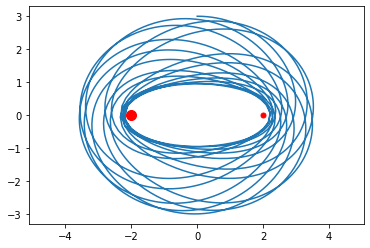

In [16]:
G = 4*np.pi**2 # Gravitational constant
S1 = [-2,0] # Coordinates of Star 1
S2 = [2,0] # Coordinates of Star 2
M1 = 2 # Mass of Star 1 (in solar mass)
M2 = 1 # Mass of Star 2 (in solar mass)

def f(u,t):
    d1 = np.linalg.norm([u[0] - S1[0],u[2] - S1[1]])
    d2 = np.linalg.norm([u[0] - S2[0],u[2] - S2[1]])
    dudt = [0,0,0,0]
    dudt[0] = u[1]
    dudt[1] = -G*M1*(u[0] - S1[0])/d1**3 - G*M2*(u[0] - S2[0])/d2**3
    dudt[2] = u[3]
    dudt[3] = -G*M1*(u[2] - S1[1])/d1**3 - G*M2*(u[2] - S2[1])/d2**3
    return dudt

u0 = [0,5,3,0] # Initial conditions of the planet: [xposition,xvelocity,yposition,yvelocity]
t = np.linspace(0,30,2000) # Array of time values (in years)
u = spi.odeint(f,u0,t) # Solve system: u = [xposition,xvelocity,yposition,yvelocity]

plt.plot(u[:,0],u[:,2]) # Plot trajectory of the planet
plt.plot(S1[0],S1[1],'ro',markersize=5*M1) # Plot Star 1 as a red star
plt.plot(S2[0],S2[1],'ro',markersize=5*M2) # Plot Star 2 as a red star
plt.axis('equal')
plt.show()

Let's put the code above into a function that we can call with different initial conditions to see what kinds of orbits we can create!

In [17]:
def euler3body(S1,S2,M1,M2,u0,tf,numpoints=1000):

    # Define the vector function on the right side of the system of the equations
    def f(u,t):
        d1 = np.linalg.norm([u[0]-S1[0],u[2]-S1[1]])
        d2 = np.linalg.norm([u[0]-S2[0],u[2]-S2[1]])
        dudt = [0,0,0,0]
        dudt[0] = u[1]
        dudt[1] = -G*M1*(u[0]-S1[0])/d1**3 - G*M2*(u[0]-S2[0])/d2**3
        dudt[2] = u[3]
        dudt[3] = -G*M1*(u[2]-S1[1])/d1**3 - G*M2*(u[2]-S2[1])/d2**3
        return dudt

    t = np.linspace(0,tf,numpoints) # Array of time values (in years)
    u = spi.odeint(f,u0,t) # Solve system: u = [xposition,xvelocity,yposition,yvelocity]

    plt.plot(u[:,0],u[:,2]) # Plot trajectory of the planet
    plt.plot(S1[0],S1[1],'ro',markersize=5*M1) # Plot Star 1 as a red star
    plt.plot(S2[0],S2[1],'ro',markersize=5*M2) # Plot Star 2 as a red star
    plt.axis('equal')
    plt.show()

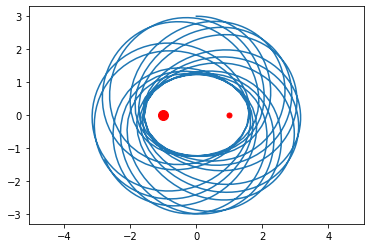

In [18]:
euler3body([-1,0],[1,0],2,1,[0,5,3,0],30)

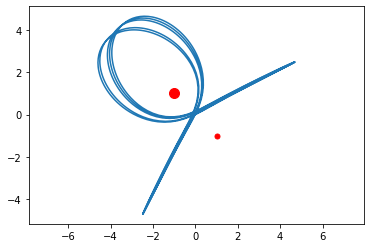

In [19]:
euler3body([-1,1],[1,-1],2,1,[0,10,0,5],30)

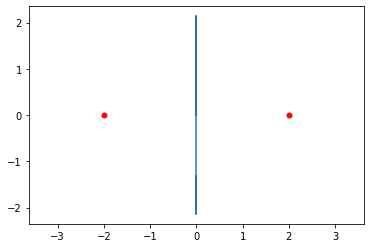

In [20]:
euler3body([-2,0],[2,0],1,1,[0,0,0,5],5)

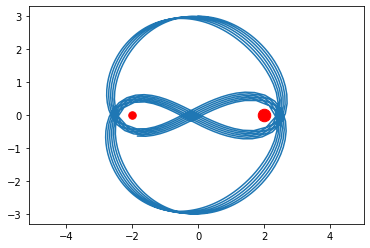

In [21]:
euler3body([-2,0],[2,0],1.5,2.5,[0,4.8,3,0],20)

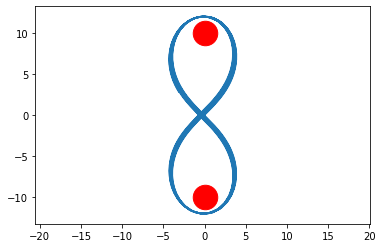

In [22]:
euler3body([0,10],[0,-10],4.9,4.9,[0,np.pi,0,np.pi],100)

## Exercises

*Under construction*